"C:\Program Files\python.exe" -m venv myenv




In [ ]:
import sys

# Print the Python version
print(sys.version)


3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [ ]:
!pip install emoji

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Importing Libraries
import pandas as pd
import re

In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import emoji

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#file_path = 'Downloads/df_all_merged&filtered_cleaned_data_topiclabels.feather'
file_path2 = 'Downloads/df_all_sentiment.feather'

df = pd.read_feather(file_path2)
#dfmar = pd.read_feather(file_path2)

In [ ]:
import numpy as np


def categorize_tweets_by_userid(df, userid_column):

    # Define the conditions for categorization
    conditions = [
        df[userid_column] == '25073877',  # Trump's user ID
        df[userid_column] == '1339835893'  # Clinton's user ID
    ]

    # Define the corresponding labels for the conditions
    choices = ['trump', 'clinton']

    # Apply the conditions and choices to the DataFrame
    df['tweet_by'] = np.select(conditions, choices, default='others')

    return df

# Apply the function to your DataFrame
df = categorize_tweets_by_userid(df, 'userid')


In [ ]:
filtered_dft = df[df['tweet_by'] == 'trump']
filtered_dfc = df[df['tweet_by'] == 'clinton']
filtered_dfo = df[df['tweet_by'] == 'others']

In [ ]:
sampled_df = filtered_dfo.sample(frac=0.17, random_state=42)


In [ ]:
df_merged = pd.concat([filtered_dft, filtered_dfc, sampled_df], ignore_index=True)


In [ ]:
unique_userid_count = df_merged['userid'].nunique()
print(unique_userid_count)
# there are 852278 unique users in this dataset.

1056708


In [ ]:
len(df_merged)

3917432

In [ ]:
len(df_merged[df_merged['tweet_by'] == 'others'])

3909740

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
filtered_dft = filtered_dft.reset_index(drop=True)

top2vec is used for the topic modeling but it alos taking to analyize longer than we expected so to finish this in given time we had to consider a smaller dataset. so we took all the tweets by the trump and used that filtered dataset for next process. if we got more resources we could gone without any filtration.

In [ ]:

from sklearn.model_selection import train_test_split

# Assuming df_final_2 is your DataFrame
train_df, test_df = train_test_split(filtered_dft, test_size=0.1, random_state=42)
# Now train_df contains 90% of the data, and test_df contains 10% of the data
train_df = train_df.reset_index(drop=True)
test_df = train_df.reset_index(drop=True)

In [ ]:
len(train_df)

2840

In [ ]:
len(test_df)

2840

In [ ]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install tensorflow-text


In [ ]:
pip install top2vec


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install top2vec[sentence_transformers]


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install top2vec[indexing]


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install top2vec[sentence_encoders]


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from top2vec import Top2Vec

# Number of CPU cores
num_cores = os.cpu_count()

print(num_cores)


16


In [ ]:
from top2vec import Top2Vec
# Extracting the 'clean_data' column
text_data = train_df['clean_data'].dropna().tolist()

# Create the Top2Vec model
modeltop2vec = Top2Vec(documents=text_data, speed='learn', workers=num_cores)

2023-12-18 23:17:43,366 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
C:\Users\bgarikip\myenv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-12-18 23:17:43,459 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-12-18 23:17:45,315 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-18 23:18:00,289 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-18 23:18:08,900 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-18 23:18:08,999 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
modeltop2vec.get_num_topics()

4

In [ ]:
topic_sizes , topic_nums = modeltop2vec.get_topic_sizes()
print(topic_nums)

[0 1 2 3]


In [ ]:
topic_words,word_scores,topic_nums = modeltop2vec.get_topics(3)
for words , scores, num in zip(topic_words,word_scores,topic_nums):
    print(num)
    print(f"words:{words}")

0
words:['hillary' 'clinton' 'trump' 'obama' 'republican' 'president' 'vote'
 'bernie' 'thank' 'poll' 'dishonest' 'america' 'americafirst' 'wow' 'bad'
 'rally' 'imwithyou' 'debate' 'campaign' 'great' 'crooked' 'american'
 'win' 'amazing' 'good' 'tonight' 'florida' 'ted' 'much' 'last' 'never'
 'love' 'get' 'totally' 'join' 'ohio' 'go' 'people' 'said' 'today' 'many'
 'tomorrow' 'media' 'speech' 'would' 'big' 'draintheswamp' 'interviewed'
 'carolina' 'enjoy']
1
words:['america' 'americafirst' 'american' 'obama' 'great' 'trump' 'amazing'
 'president' 'wow' 'vote' 'hillary' 'good' 'republican' 'win' 'clinton'
 'bernie' 'country' 'big' 'join' 'make' 'enjoy' 'thank' 'go' 'florida'
 'rally' 'get' 'media' 'much' 'campaign' 'imwithyou' 'bad' 'love' 'show'
 'speech' 'soon' 'cruz' 'tomorrow' 'us' 'poll' 'crooked' 'ted' 'like'
 'want' 'draintheswamp' 'maga' 'many' 'would' 'debate' 'watch' 'ohio']
2
words:['obama' 'hillary' 'trump' 'republican' 'president' 'clinton' 'bernie'
 'crooked' 'vote' 'disho

In [ ]:
train_df.head()

,text,tweetid,userid,rt_id,rt_userid,retweet_count,day_of_week,month,day,hour,...,year,timezone,contains_link,emojis,tweet_length,clean_data,W_date,tweet_by,vader_sentiment,sentiment
0,"Ron Fournier: ""Clinton Used Secret Server To P...",791643269109350400,25073877,there are retweets,there are retweets,13092.0,Thursday,October,27,14,...,2016,+0000,True,[],97,ron fournier clinton used secret server protec...,2016-10-27,trump,0.3818,positive
1,"""@SassyPantsjj: Michigan GOP poll 2/24/2016 Tr...",703562075616849920,25073877,there are retweets,there are retweets,1750.0,Saturday,February,27,12,...,2016,+0000,False,[],121,<user> michigan gop poll 2/24 <number> trump 3...,2016-02-27,trump,0.5859,positive
2,WEST VIRGINIA #VoteTrump TODAY!\n#MakeAmericaG...,730054891897536514,25073877,there are retweets,there are retweets,3562.0,Tuesday,May,10,15,...,2016,+0000,True,[],89,west virginia votetrump today makeamericagreat...,2016-05-10,trump,0.0000,negative
3,Praying for the families of the two Iowa polic...,793824247168765952,25073877,there are retweets,there are retweets,21254.0,Wednesday,November,2,14,...,2016,+0000,False,[],139,praying families two iowa police ambushed morn...,2016-11-02,trump,-0.2023,negative
4,Why isn't Hillary Clinton 50 points ahead?\n#D...,780569413321789440,25073877,there are retweets,there are retweets,13963.0,Tuesday,September,27,0,...,2016,+0000,True,[],79,hillary clinton <number> points ahead debatenight,2016-09-27,trump,0.0000,negative


In [ ]:
len(train_df)

2840

In [ ]:
# Initialize new columns in the DataFrame
train_df['dominant_topic'] = -1
train_df['highest_topic_score'] = 0  # To store the highest similarity score

num_topics = modeltop2vec.get_num_topics()
topic_sizes = modeltop2vec.get_topic_sizes()[0]

# Iterate through each topic
for t in range(num_topics):
    # Get the most relevant documents and their scores for the current topic
    documents, document_scores, document_ids = modeltop2vec.search_documents_by_topic(topic_num=t, num_docs=topic_sizes[t])

    for doc_index, doc_id in enumerate(document_ids):
        # Ensure doc_id is in train_df
        if doc_id in train_df.index:
            # Check if this topic's score for the document is higher than the previously stored score
            if document_scores[doc_index] > train_df.at[doc_id, 'highest_topic_score']:
                # Update the dominant topic and highest topic score
                train_df.at[doc_id, 'dominant_topic'] = t
                train_df.at[doc_id, 'highest_topic_score'] = document_scores[doc_index]

# Drop the 'highest_topic_score' column if it's no longer needed
#train_df.drop('highest_topic_score', axis=1, inplace=True)



C:\Users\bgarikip\AppData\Local\Temp\ipykernel_14448\3042121764.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.7762103080749512' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.at[doc_id, 'highest_topic_score'] = document_scores[doc_index]


In [ ]:
'''# Initialize the column for the count of topic words
train_df['count_of_topic_words_matching_clean_data'] = 0

# Retrieve topic words for each topic
topic_words_list = modeltop2vec.get_topics()[0]

# Convert the list of words for each topic into a set for faster lookup
topic_words_sets = [set(words) for words in topic_words_list]

# Iterate over each row in the DataFrame
for index, row in train_df.iterrows():
    # Get the dominant topic for the current document
    dominant_topic = row['dominant_topic']

    # Continue only if a dominant topic is assigned
    if dominant_topic != -1:
        # Tokenize the 'clean_data' text into words
        document_words = set(row['clean_data'].split())

        # Count how many words are in common with the topic's words
        common_words_count = len(document_words.intersection(topic_words_sets[dominant_topic]))

        # Assign the count to the 'count_of_topic_words' column
        train_df.at[index, 'count_of_topic_words_matching_clean_data'] = common_words_count

# Now 'train_df' contains a new column 'count_of_topic_words' with the count of matching topic words for each document
'''

"# Initialize the column for the count of topic words\ntrain_df['count_of_topic_words_matching_clean_data'] = 0\n\n# Retrieve topic words for each topic\ntopic_words_list = modeltop2vec.get_topics()[0]\n\n# Convert the list of words for each topic into a set for faster lookup\ntopic_words_sets = [set(words) for words in topic_words_list]\n\n# Iterate over each row in the DataFrame\nfor index, row in train_df.iterrows():\n    # Get the dominant topic for the current document\n    dominant_topic = row['dominant_topic']\n\n    # Continue only if a dominant topic is assigned\n    if dominant_topic != -1:\n        # Tokenize the 'clean_data' text into words\n        document_words = set(row['clean_data'].split())\n\n        # Count how many words are in common with the topic's words\n        common_words_count = len(document_words.intersection(topic_words_sets[dominant_topic]))\n\n        # Assign the count to the 'count_of_topic_words' column\n        train_df.at[index, 'count_of_topic_wor

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 2840 non-null   object 
 1   tweetid              2840 non-null   object 
 2   userid               2840 non-null   object 
 3   rt_id                2840 non-null   object 
 4   rt_userid            2840 non-null   object 
 5   retweet_count        2840 non-null   float64
 6   day_of_week          2840 non-null   object 
 7   month                2840 non-null   object 
 8   day                  2840 non-null   int32  
 9   hour                 2840 non-null   int32  
 10  minute               2840 non-null   int32  
 11  second               2840 non-null   int32  
 12  year                 2840 non-null   int32  
 13  timezone             2840 non-null   object 
 14  contains_link        2840 non-null   bool   
 15  emojis               2840 non-null   o

In [ ]:
train_df.head(120)

,text,tweetid,userid,rt_id,rt_userid,retweet_count,day_of_week,month,day,hour,...,contains_link,emojis,tweet_length,clean_data,W_date,tweet_by,vader_sentiment,sentiment,dominant_topic,highest_topic_score
0,"Ron Fournier: ""Clinton Used Secret Server To P...",791643269109350400,25073877,there are retweets,there are retweets,13092.0,Thursday,October,27,14,...,True,[],97,ron fournier clinton used secret server protec...,2016-10-27,trump,0.3818,positive,0,0.449506
1,"""@SassyPantsjj: Michigan GOP poll 2/24/2016 Tr...",703562075616849920,25073877,there are retweets,there are retweets,1750.0,Saturday,February,27,12,...,False,[],121,<user> michigan gop poll 2/24 <number> trump 3...,2016-02-27,trump,0.5859,positive,0,0.373303
2,WEST VIRGINIA #VoteTrump TODAY!\n#MakeAmericaG...,730054891897536514,25073877,there are retweets,there are retweets,3562.0,Tuesday,May,10,15,...,True,[],89,west virginia votetrump today makeamericagreat...,2016-05-10,trump,0.0000,negative,0,0.689020
3,Praying for the families of the two Iowa polic...,793824247168765952,25073877,there are retweets,there are retweets,21254.0,Wednesday,November,2,14,...,False,[],139,praying families two iowa police ambushed morn...,2016-11-02,trump,-0.2023,negative,0,0.325258
4,Why isn't Hillary Clinton 50 points ahead?\n#D...,780569413321789440,25073877,there are retweets,there are retweets,13963.0,Tuesday,September,27,0,...,True,[],79,hillary clinton <number> points ahead debatenight,2016-09-27,trump,0.0000,negative,0,0.647986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,STATEMENT ON MELANIA SPEECH\nhttps://t.co/uzBO...,755810077307727872,25073877,there are retweets,there are retweets,5435.0,Wednesday,July,20,17,...,True,[],51,statement melania speech,2016-07-20,trump,0.0000,negative,1,0.196112
116,"""@SkylerDeckard: @realDonaldTrump ""that's beca...",703194690498088961,25073877,there are retweets,there are retweets,1460.0,Friday,February,26,12,...,False,[],131,<user> <user> that's never hired anyone work f...,2016-02-26,trump,0.4588,positive,0,0.389889
117,Thank you Governor @ScottWalker &amp; @GOP Cha...,765950471160954884,25073877,there are retweets,there are retweets,4531.0,Wednesday,August,17,16,...,True,[],127,thank governor <user> <user> chairman <user> p...,2016-08-17,trump,0.3612,positive,0,0.583896
118,"Lyin’ Ted Cruz steals foreign policy from me, ...",712727046913462272,25073877,there are retweets,there are retweets,4600.0,Wednesday,March,23,19,...,False,[],112,lyin ted cruz steals foreign policy lines mich...,2016-03-23,trump,-0.7906,negative,0,0.478866


In [ ]:
# Resetting the index of the DataFrame
train_df.reset_index(drop=True, inplace=True)

# Saving the DataFrame to a Feather file
train_df.to_csv('df_topicall_trump.csv')


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Retrieve topics and their words
topics_words,word_scores,topic_nums = modeltop2vec.get_topics()

# Initialize an empty list to store the topic-word pairs
topic_word_pairs = []

# Iterate over each topic to get the words and create pairs
for idx, topic_num in enumerate(topic_nums):
    words = topics_words[idx]
    topic_word_pairs.append({'Topic': topic_num, 'Word': words})

# Convert the list of dictionaries to a DataFrame
df_topic_word_pairs = pd.DataFrame(topic_word_pairs)

# topic_words_df now contains two columns: 'Topic' and 'Word'


In [ ]:
# Resetting the index of the DataFrame
df_topic_word_pairs.reset_index(drop=True, inplace=True)

# Saving the DataFrame to a Feather file
df_topic_word_pairs.to_feather('df_topic_list.csv')


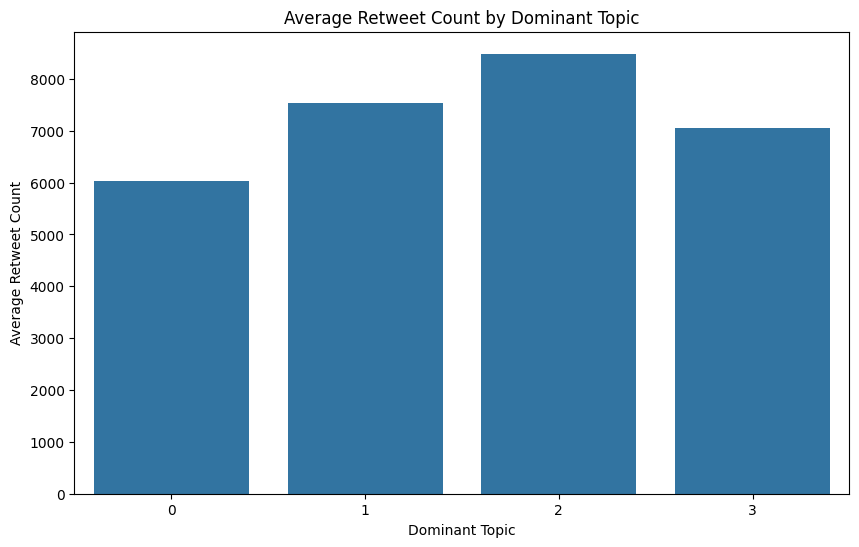

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the relationship between 'dominant_topic' and 'retweet_count'
topic_retweet_analysis = train_df.groupby('dominant_topic')['retweet_count'].mean().sort_values(ascending=False)

# Plotting the analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_retweet_analysis.index, y=topic_retweet_analysis.values)
plt.title('Average Retweet Count by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Retweet Count')
plt.show()


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 2840 non-null   object 
 1   tweetid              2840 non-null   object 
 2   userid               2840 non-null   object 
 3   rt_id                2840 non-null   object 
 4   rt_userid            2840 non-null   object 
 5   retweet_count        2840 non-null   float64
 6   day_of_week          2840 non-null   object 
 7   month                2840 non-null   object 
 8   day                  2840 non-null   int32  
 9   hour                 2840 non-null   int32  
 10  minute               2840 non-null   int32  
 11  second               2840 non-null   int32  
 12  year                 2840 non-null   int32  
 13  timezone             2840 non-null   object 
 14  contains_link        2840 non-null   bool   
 15  emojis               2840 non-null   o

# to predict best topic with highest reach given a data

regression -model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming you have a DataFrame named 'train_df'
# Features and target for the regression model
features_reg = train_df[['day_of_week', 'month', 'day', 'hour', 'minute', 'second', 'year', 'tweet_length', 'sentiment']]
target_reg = train_df['retweet_count']

# Encoding categorical variables and standardizing numerical variables
encoder = OneHotEncoder()
scaler = StandardScaler()
encoded_features_reg = encoder.fit_transform(features_reg[['day_of_week', 'month', 'sentiment']]).toarray()
numerical_features_reg = scaler.fit_transform(features_reg[['day', 'hour', 'minute', 'second', 'year', 'tweet_length']])
X_reg = np.hstack([encoded_features_reg, numerical_features_reg])

# Splitting the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, target_reg, test_size=0.2, random_state=42)

# Training the Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_reg, y_train_reg)

# Predicting and evaluating the regression model
y_pred_reg = random_forest_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print('MSE:', mse_reg)
print('R2 Score:', r2_reg)


MSE: 57059774.965042785
R2 Score: 0.18675044359009918


for the regression we got this r2 beacuse we dont have the features that explains alot of the target varble which retweet count. we would have get a better resulst if we have features like number of likes , unlikes, followers  and commnets.

classifier -model -1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Features and target for the classification model
features_class = train_df[['day_of_week', 'month', 'day', 'hour', 'minute', 'second', 'year', 'tweet_length', 'sentiment','retweet_count']]
target_class = train_df['dominant_topic']

# Encoding and standardizing features for the classification model
encoded_features_class = encoder.transform(features_class[['day_of_week', 'month', 'sentiment']]).toarray()
numerical_features_class = scaler.transform(features_class[['day', 'hour', 'minute', 'second', 'year', 'tweet_length']])
X_class = np.hstack([encoded_features_class, numerical_features_class])

# Splitting the dataset for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, target_class, test_size=0.2, random_state=42)

# Training the classification model
classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_model.fit(X_train_class, y_train_class)

# Predicting and evaluating the classification model
y_pred_class = classifier_model.predict(X_test_class)
accuracy_class = (y_pred_class == y_test_class).mean()

print('Accuracy:', accuracy_class)


Accuracy: 0.926056338028169


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test_class, y_pred_class, average='weighted')  # 'weighted' takes into account label imbalance

print('F1 Score:', f1)


F1 Score: 0.8960237060580285


# test

In [ ]:
test_dff =test_df.copy()

In [ ]:
test_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             2840 non-null   object 
 1   tweetid          2840 non-null   object 
 2   userid           2840 non-null   object 
 3   rt_id            2840 non-null   object 
 4   rt_userid        2840 non-null   object 
 5   retweet_count    2840 non-null   float64
 6   day_of_week      2840 non-null   object 
 7   month            2840 non-null   object 
 8   day              2840 non-null   int32  
 9   hour             2840 non-null   int32  
 10  minute           2840 non-null   int32  
 11  second           2840 non-null   int32  
 12  year             2840 non-null   int32  
 13  timezone         2840 non-null   object 
 14  contains_link    2840 non-null   bool   
 15  emojis           2840 non-null   object 
 16  tweet_length     2840 non-null   int64  
 17  clean_data    

In [ ]:
test_df.rename(columns={'retweet_count': 'actual_retweet_count'}, inplace=True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  2840 non-null   object 
 1   tweetid               2840 non-null   object 
 2   userid                2840 non-null   object 
 3   rt_id                 2840 non-null   object 
 4   rt_userid             2840 non-null   object 
 5   actual_retweet_count  2840 non-null   float64
 6   day_of_week           2840 non-null   object 
 7   month                 2840 non-null   object 
 8   day                   2840 non-null   int32  
 9   hour                  2840 non-null   int32  
 10  minute                2840 non-null   int32  
 11  second                2840 non-null   int32  
 12  year                  2840 non-null   int32  
 13  timezone              2840 non-null   object 
 14  contains_link         2840 non-null   bool   
 15  emojis               

In [ ]:
features_test = test_df[['day_of_week', 'month', 'day', 'hour', 'minute', 'second', 'year', 'tweet_length', 'sentiment']]

# Encoding and standardizing the test data
# Note: Use the same encoder and scaler fitted on the training data
encoded_features_test = encoder.transform(features_test[['day_of_week', 'month', 'sentiment']]).toarray()
numerical_features_test = scaler.transform(features_test[['day', 'hour', 'minute', 'second', 'year', 'tweet_length']])
X_test = np.hstack([encoded_features_test, numerical_features_test])

 #Making predictions on the test data
predicted_retweet_count = random_forest_model.predict(X_test)

In [ ]:
# Attach the predictions to the test dataset
test_df['retweet_count'] = predicted_retweet_count

# Now test_df contains an additional column with the predicted retweet counts
test_df.head()  # Display the first few rows of the modified test dataset


,text,tweetid,userid,rt_id,rt_userid,actual_retweet_count,day_of_week,month,day,hour,...,timezone,contains_link,emojis,tweet_length,clean_data,W_date,tweet_by,vader_sentiment,sentiment,retweet_count
0,"Ron Fournier: ""Clinton Used Secret Server To P...",791643269109350400,25073877,there are retweets,there are retweets,13092.0,Thursday,October,27,14,...,+0000,True,[],97,ron fournier clinton used secret server protec...,2016-10-27,trump,0.3818,positive,12968.00
1,"""@SassyPantsjj: Michigan GOP poll 2/24/2016 Tr...",703562075616849920,25073877,there are retweets,there are retweets,1750.0,Saturday,February,27,12,...,+0000,False,[],121,<user> michigan gop poll 2/24 <number> trump 3...,2016-02-27,trump,0.5859,positive,2141.06
2,WEST VIRGINIA #VoteTrump TODAY!\n#MakeAmericaG...,730054891897536514,25073877,there are retweets,there are retweets,3562.0,Tuesday,May,10,15,...,+0000,True,[],89,west virginia votetrump today makeamericagreat...,2016-05-10,trump,0.0000,negative,3456.00
3,Praying for the families of the two Iowa polic...,793824247168765952,25073877,there are retweets,there are retweets,21254.0,Wednesday,November,2,14,...,+0000,False,[],139,praying families two iowa police ambushed morn...,2016-11-02,trump,-0.2023,negative,17905.12
4,Why isn't Hillary Clinton 50 points ahead?\n#D...,780569413321789440,25073877,there are retweets,there are retweets,13963.0,Tuesday,September,27,0,...,+0000,True,[],79,hillary clinton <number> points ahead debatenight,2016-09-27,trump,0.0000,negative,12830.76


In [ ]:
# Prepare features for the test data
features_test = test_df[['day_of_week', 'month', 'day', 'hour', 'minute', 'second', 'year', 'tweet_length', 'sentiment','retweet_count']]
# Encoding and standardizing the test data
# Note: Use the same encoder and scaler fitted on the training data
encoded_features_test = encoder.transform(features_test[['day_of_week', 'month', 'sentiment']]).toarray()
numerical_features_test = scaler.transform(features_test[['day', 'hour', 'minute', 'second', 'year', 'tweet_length']])
X_test = np.hstack([encoded_features_test, numerical_features_test])

# Making predictions on the test data
predicted_dominant_topic = classifier_model.predict(X_test)

In [ ]:
# Attach the predictions to the test dataset
test_df['predicted_dominant_topic'] = predicted_dominant_topic

# Now test_df contains an additional column with the predicted retweet counts
test_df.head()  # Display the first few rows of the modified test dataset

,text,tweetid,userid,rt_id,rt_userid,actual_retweet_count,day_of_week,month,day,hour,...,contains_link,emojis,tweet_length,clean_data,W_date,tweet_by,vader_sentiment,sentiment,retweet_count,predicted_dominant_topic
0,"Ron Fournier: ""Clinton Used Secret Server To P...",791643269109350400,25073877,there are retweets,there are retweets,13092.0,Thursday,October,27,14,...,True,[],97,ron fournier clinton used secret server protec...,2016-10-27,trump,0.3818,positive,12968.00,0
1,"""@SassyPantsjj: Michigan GOP poll 2/24/2016 Tr...",703562075616849920,25073877,there are retweets,there are retweets,1750.0,Saturday,February,27,12,...,False,[],121,<user> michigan gop poll 2/24 <number> trump 3...,2016-02-27,trump,0.5859,positive,2141.06,0
2,WEST VIRGINIA #VoteTrump TODAY!\n#MakeAmericaG...,730054891897536514,25073877,there are retweets,there are retweets,3562.0,Tuesday,May,10,15,...,True,[],89,west virginia votetrump today makeamericagreat...,2016-05-10,trump,0.0000,negative,3456.00,0
3,Praying for the families of the two Iowa polic...,793824247168765952,25073877,there are retweets,there are retweets,21254.0,Wednesday,November,2,14,...,False,[],139,praying families two iowa police ambushed morn...,2016-11-02,trump,-0.2023,negative,17905.12,0
4,Why isn't Hillary Clinton 50 points ahead?\n#D...,780569413321789440,25073877,there are retweets,there are retweets,13963.0,Tuesday,September,27,0,...,True,[],79,hillary clinton <number> points ahead debatenight,2016-09-27,trump,0.0000,negative,12830.76,0


# evaluation



In [ ]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame named df

# Calculate the difference between actual and predicted retweet counts
test_df['difference'] = test_df['retweet_count'] - test_df['actual_retweet_count']

# Calculate the total sum of differences (absolute value)
total_difference = test_df['difference'].abs().sum()

# Calculate the sum of actual retweet counts
total_actual_retweet_count = test_df['actual_retweet_count'].sum()

# Calculate the total percentage of error
total_percentage_error = (total_difference / total_actual_retweet_count) * 100

# Print the total difference and total percentage of error
print("Total Percentage of Error:", total_percentage_error)


Total Percentage of Error: 22.729893847774438


even though we got the less r2 , the error percentage for the retweent count is 22% which means we got a better results form this model.

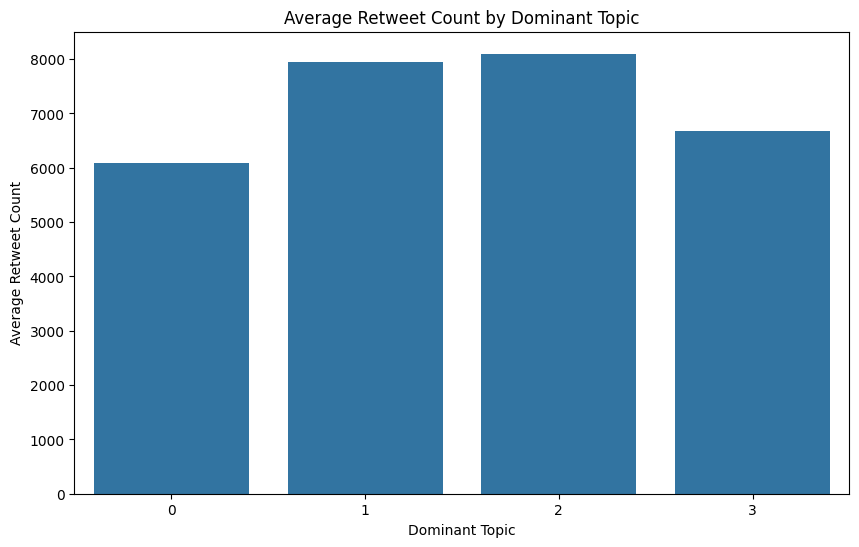

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the relationship between 'dominant_topic' and 'retweet_count'
topic_retweet_analysis = test_df.groupby('predicted_dominant_topic')['retweet_count'].mean().sort_values(ascending=False)

# Plotting the analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_retweet_analysis.index, y=topic_retweet_analysis.values)
plt.title('Average Retweet Count by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Retweet Count')
plt.show()


#to predict the topic given a tweet

classifer_model-2

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Feature Engineering
features_selected = [
    'vader_sentiment',
    'day_of_week',
    'month',
    'tweet_length',
    'retweet_count'
]

# Prepare the training data
X_train_features = train_df[features_selected]
y_train = train_df['dominant_topic']

# Encoding categorical variables in training data
day_encoder = LabelEncoder()
month_encoder = LabelEncoder()
X_train_features['day_of_week'] = day_encoder.fit_transform(X_train_features['day_of_week'])
X_train_features['month'] = month_encoder.fit_transform(X_train_features['month'])

# Normalizing the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)

# Splitting the training dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prepare the test data
X_test_features = test_df[features_selected]
X_test_features['day_of_week'] = day_encoder.transform(X_test_features['day_of_week'])
X_test_features['month'] = month_encoder.transform(X_test_features['month'])

# Normalizing the test features using the same scaler object
X_test_scaled = scaler.transform(X_test_features)


C:\Users\bgarikip\AppData\Local\Temp\ipykernel_14448\1875743271.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_features['day_of_week'] = day_encoder.fit_transform(X_train_features['day_of_week'])
C:\Users\bgarikip\AppData\Local\Temp\ipykernel_14448\1875743271.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_features['month'] = month_encoder.fit_transform(X_train_features['month'])
C:\Users\bgarikip\AppData\Local\Temp\ipykernel_14448\1875743271.py:38: SettingWithCopyWarning: 
A valu

In [ ]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)

report

C:\Users\bgarikip\myenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgarikip\myenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgarikip\myenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       522\n           1       0.70      0.27      0.39        26\n           2       0.00      0.00      0.00        13\n           3       0.00      0.00      0.00         7\n\n    accuracy                           0.93       568\n   macro avg       0.41      0.32      0.34       568\nweighted avg       0.89      0.93      0.90       568\n'

In [ ]:
# Calculating the weighted average F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print('Weighted Average F1 Score:', f1)

Weighted Average F1 Score: 0.9010758998435054


In [ ]:
y_test_pred = rf_model.predict(X_test_scaled)

# Attach the predictions to the test dataset
test_dff['predicted_dominant_topic_2'] = y_test_pred

test_dff.head()  # Display the first few rows of the modified test dataset

,text,tweetid,userid,rt_id,rt_userid,retweet_count,day_of_week,month,day,hour,...,timezone,contains_link,emojis,tweet_length,clean_data,W_date,tweet_by,vader_sentiment,sentiment,predicted_dominant_topic_2
0,"Ron Fournier: ""Clinton Used Secret Server To P...",791643269109350400,25073877,there are retweets,there are retweets,13092.0,Thursday,October,27,14,...,+0000,True,[],97,ron fournier clinton used secret server protec...,2016-10-27,trump,0.3818,positive,0
1,"""@SassyPantsjj: Michigan GOP poll 2/24/2016 Tr...",703562075616849920,25073877,there are retweets,there are retweets,1750.0,Saturday,February,27,12,...,+0000,False,[],121,<user> michigan gop poll 2/24 <number> trump 3...,2016-02-27,trump,0.5859,positive,0
2,WEST VIRGINIA #VoteTrump TODAY!\n#MakeAmericaG...,730054891897536514,25073877,there are retweets,there are retweets,3562.0,Tuesday,May,10,15,...,+0000,True,[],89,west virginia votetrump today makeamericagreat...,2016-05-10,trump,0.0000,negative,0
3,Praying for the families of the two Iowa polic...,793824247168765952,25073877,there are retweets,there are retweets,21254.0,Wednesday,November,2,14,...,+0000,False,[],139,praying families two iowa police ambushed morn...,2016-11-02,trump,-0.2023,negative,0
4,Why isn't Hillary Clinton 50 points ahead?\n#D...,780569413321789440,25073877,there are retweets,there are retweets,13963.0,Tuesday,September,27,0,...,+0000,True,[],79,hillary clinton <number> points ahead debatenight,2016-09-27,trump,0.0000,negative,0


In [ ]:
# Assuming 'tweetid' is a common identifier in both test_df and test_dff
test_df = test_df.merge(test_dff[['tweetid', 'predicted_dominant_topic_2']], on='tweetid', how='left')

# Display the first few rows of the modified test_df
test_df.head()


,text,tweetid,userid,rt_id,rt_userid,actual_retweet_count,day_of_week,month,day,hour,...,tweet_length,clean_data,W_date,tweet_by,vader_sentiment,sentiment,retweet_count,predicted_dominant_topic,difference,predicted_dominant_topic_2
0,"Ron Fournier: ""Clinton Used Secret Server To P...",791643269109350400,25073877,there are retweets,there are retweets,13092.0,Thursday,October,27,14,...,97,ron fournier clinton used secret server protec...,2016-10-27,trump,0.3818,positive,12968.00,0,-124.00,0
1,"""@SassyPantsjj: Michigan GOP poll 2/24/2016 Tr...",703562075616849920,25073877,there are retweets,there are retweets,1750.0,Saturday,February,27,12,...,121,<user> michigan gop poll 2/24 <number> trump 3...,2016-02-27,trump,0.5859,positive,2141.06,0,391.06,0
2,WEST VIRGINIA #VoteTrump TODAY!\n#MakeAmericaG...,730054891897536514,25073877,there are retweets,there are retweets,3562.0,Tuesday,May,10,15,...,89,west virginia votetrump today makeamericagreat...,2016-05-10,trump,0.0000,negative,3456.00,0,-106.00,0
3,Praying for the families of the two Iowa polic...,793824247168765952,25073877,there are retweets,there are retweets,21254.0,Wednesday,November,2,14,...,139,praying families two iowa police ambushed morn...,2016-11-02,trump,-0.2023,negative,17905.12,0,-3348.88,0
4,Why isn't Hillary Clinton 50 points ahead?\n#D...,780569413321789440,25073877,there are retweets,there are retweets,13963.0,Tuesday,September,27,0,...,79,hillary clinton <number> points ahead debatenight,2016-09-27,trump,0.0000,negative,12830.76,0,-1132.24,0


for predictive analysis we done three models

1.   Regression Model:

Purpose: To predict the retweet count.
Features Used: A set of features was experimented with, including dominant topic and sentiment score. However, to achieve the best R² value, a refined set of features was selected.
Performance: The model's performance was evaluated based on the R² value, which measures the proportion of variance in the dependent variable that is predictable from the independent variables.
2.   Classifier Model 1:

Purpose: To predict the dominant topic.
Features Used: 'day_of_week', 'month', 'day', 'hour', 'minute', 'second', 'year', 'tweet_length', 'sentiment', 'retweet_count'.
Performance: This model achieved an accuracy of 92% and an F1 score of 89%, indicating its effectiveness in classifying the dominant topic based on the given features.
3.   Classifier Model 2:

Purpose: Also to predict the dominant topic.
Features Used: 'vader_sentiment', 'day_of_week', 'month', 'tweet_length', 'retweet_count'.
Performance: This model showed an accuracy of 93% and an F1 score of 90.10%, demonstrating a slightly improved performance compared to Classifier Model 1. even the clasifier still gave the best results it would have given much more better results if we more data as mentioned before or used larger dataset(we have to filter the data becuse of ur resurces limitations.)


Direct Analysis: By examining the retweet count vs. dominant topic bar graph, stakeholders can identify which topics garner the most retweets and tailor their content accordingly.

or
Predictive Approach:
we can predict the dominat topic in two ways by the available features.

1. Time and Sentiment-Based Prediction: If only time data and sentiment (positive or negative) are available, stakeholders can first use the regression model to predict the retweet count [becuse it is part of the classifier model features], and then apply Classifier Model 1 to predict the most effective topic.

2.  Text, Sentiment Score, and Time-Based Prediction: With access to the text, sentiment score, and time details, stakeholders can use the regression model to forecast retweet counts followed by Classifier Model 2 to determine the topic. This approach is suitable for stakeholders interested in both the potential reach (retweets) and the topic relevance of their content.

3.  Direct Topic Prediction: Alternatively, stakeholders can directly use either Classifier Model 1 to predict the most suitable topic based on their requirements such as time and desired number of retweets(whichthey can assign them selfes), without incorporating the regression model in the process.

Each approach offers different insights and applications, allowing stakeholders to choose the one that best fits their specific needs and available data.



